# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict, train_level, predict_level
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 12

## Train

In [ ]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 300,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 20,
}

In [ ]:
train_level(cfg.DATA_DIR, cfg.MODEL_DIR, level, cfg.FH, params)

## Predict

In [5]:
fcst = predict_level(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level, cfg.FH)

Making predictions for level 12
Making predictions for level 12 and step 1
Making predictions for level 12 and step 2
Making predictions for level 12 and step 3
Making predictions for level 12 and step 4
Making predictions for level 12 and step 5
Making predictions for level 12 and step 6
Making predictions for level 12 and step 7
Making predictions for level 12 and step 8
Making predictions for level 12 and step 9


[LightGBM] [Fatal] Could not open /home/ariel/Playground/m5-forecasting/models/12/9/model.txt


LightGBMError: Could not open /home/ariel/Playground/m5-forecasting/models/12/9/model.txt

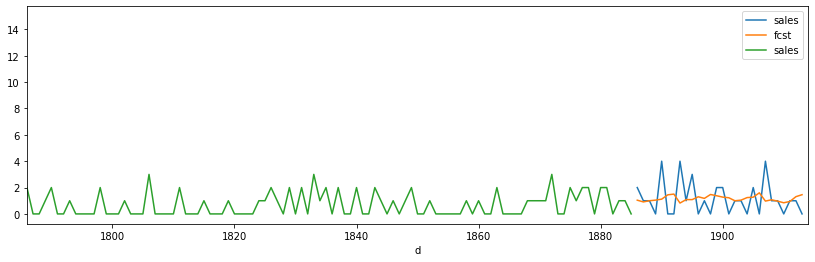

In [6]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level, step=1)

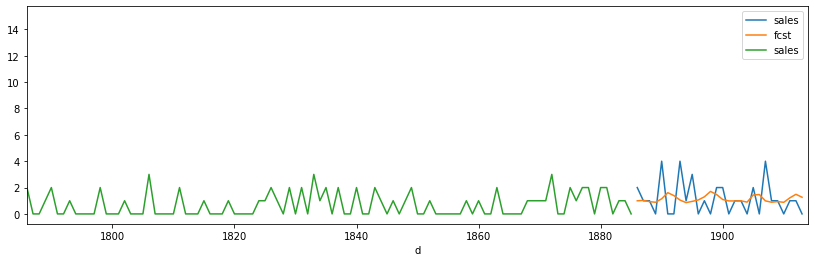

In [9]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level, step=3)

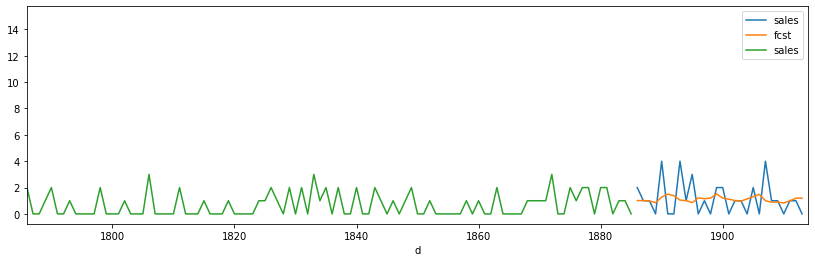

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level, step=6)

## Evaluate

In [ ]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

In [ ]:
accuracy_df["weights"].sum()

In [ ]:
accuracy_df["wrmsse"].sum()

## Misc